## Method

- Import dataset (normal + jammer)
- 

### Conditions for packet to be anomaly

- Scores to look at
  - CF
  - SF
  - TX
  - SNR
  - RSSI
- The jammed packets are `NodeID=121`

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

normal = pd.read_csv("../../datasets/normal_dataset.csv")
jammer = pd.read_csv("../../datasets/jammer_dataset.csv")
data = jammer

In [29]:
#print(data.head())

In [30]:
features = data[['SNR','RSSI']]
features = features.dropna()
print(features.shape)
features.head()

(98752, 2)


,SNR,RSSI
0,3.35339,-123.1470
1,24.72760,-101.7720
2,6.99539,-119.5050
3,8.64284,-117.8570
4,32.95130,-93.5487


In [31]:
n_estimators = 100
contaimination = 0.01
sample_size = 256

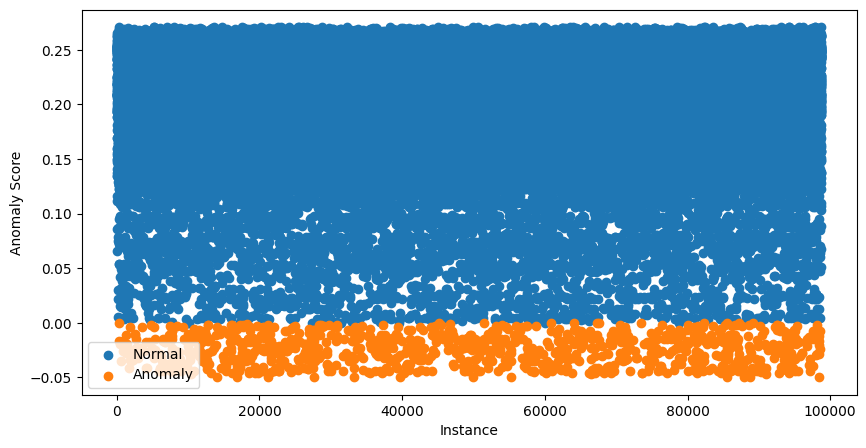

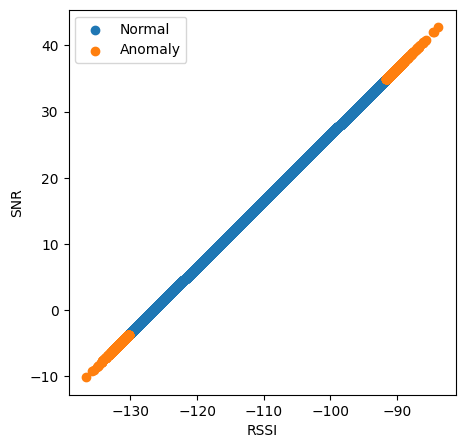

In [32]:
## Isolation Forest
IF = IsolationForest(n_estimators=n_estimators, contamination=contaimination, max_samples=sample_size, random_state=42)
IF.fit(features)

data = data.loc[features.index].copy()
data['anomaly_score'] = IF.decision_function(features)
data['anomaly'] = IF.predict(features)
data['anomaly'].value_counts()

# Visualization of the results
plt.figure(figsize=(10, 5))

# Plot normal instances
normal = data[data['anomaly'] == 1]
plt.scatter(normal.index, normal['anomaly_score'], label='Normal')

# Plot anomalies
anomalies = data[data['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['anomaly_score'], label='Anomaly')
plt.xlabel("Instance")
plt.ylabel("Anomaly Score")
plt.legend()
plt.show()

plt.figure(figsize=(5,5))

plt.scatter(normal['RSSI'], normal['SNR'], label='Normal') 
plt.scatter(anomalies['RSSI'], anomalies['SNR'], label='Anomaly')
plt.xlabel('RSSI')
plt.ylabel('SNR')
plt.legend()
plt.show()

In [33]:
# Get all anomalies
anomalies = data[data['anomaly'] == -1]

# Check how many anomalies have NodeID == 121
node121_anomalies = anomalies[anomalies['NodeID'] == 121]

print(f"Total anomalies detected: {len(anomalies)}")
print(f"Anomalies with NodeID=121: {len(node121_anomalies)}")
print(node121_anomalies)  # Show the flagged packets

# Optionally, show the proportion
if len(anomalies) > 0:
    print(f"Proportion of anomalies that are NodeID=121: {len(node121_anomalies)/len(anomalies):.2%}")

Total anomalies detected: 980
Anomalies with NodeID=121: 492
                   Time  NodeID          MAC  SF           CF  TX      BW  CR  \
357      8/30/2025 0:26     121  00-00-00-79   8  868100000.0  20  125000   1   
531      8/30/2025 0:39     121  00-00-00-79   8  868100000.0  20  125000   1   
845      8/30/2025 1:01     121  00-00-00-79  11  868100000.0  20  125000   1   
898      8/30/2025 1:05     121  00-00-00-79  12  868100000.0  20  125000   1   
1283     8/30/2025 1:35     121  00-00-00-79  11  868100000.0  20  125000   1   
...                 ...     ...          ...  ..          ...  ..     ...  ..   
97544  09/03/2025 22:29     121  00-00-00-79  12  868100000.0  20  125000   1   
98198  09/03/2025 23:19     121  00-00-00-79   7  868100000.0  20  125000   1   
98395  09/03/2025 23:33     121  00-00-00-79  11  868100000.0  20  125000   1   
98580  09/03/2025 23:46     121  00-00-00-79  11  868100000.0  20  125000   1   
98625  09/03/2025 23:50     121  00-00-00-79  11